In [1]:
require(ACER)
require(data.table)
require(poolSeq)

Loading required package: ACER
Loading required package: data.table
Loading required package: poolSeq
Loading required package: foreach
Loading required package: stringi
Loading required package: matrixStats
Loading required package: Rcpp


In [2]:
setwd("/data/sarahgw/WGS/SNPS/All_mylu/")


In [3]:
nje=fread("mafs/NJ_E_filt1.mafs", header=FALSE)
nju=fread("mafs/NJ_U_filt1.mafs", header=FALSE)
nye=fread("mafs/NY_E_filt1.mafs", header=FALSE)
nyout=fread("mafs/NY_U_noOut_filt.mafs")

Read 44829666 rows and 8 (of 8) columns from 2.119 GB file in 00:00:43
Read 44829666 rows and 8 (of 8) columns from 2.108 GB file in 00:00:44
Read 44829666 rows and 8 (of 8) columns from 2.112 GB file in 00:00:44
Read 44829616 rows and 8 (of 8) columns from 2.113 GB file in 00:00:43


In [4]:
colnames(nje)=c("Scaffold", "Position", "Major", "Minor", "Maf1_E", "Maf2_NJE", "Maf3_E", "nInd_NJE")
colnames(nju)=c("Scaffold", "Position", "Major", "Minor", "Maf1_U", "Maf2_NJU", "Maf3_U", "nInd_NJU")
colnames(nye)=c("Scaffold", "Position", "Major", "Minor", "Maf1_E", "Maf2_NYE", "Maf3_E", "nInd_NYE")
colnames(nyout)=c("Scaffold", "Position", "Major", "Minor", "Maf1_E", "Maf2_NYU", "Maf3_E", "nInd_NYU")

In [5]:
head(nje)

Scaffold,Position,Major,Minor,Maf1_E,Maf2_NJE,Maf3_E,nInd_NJE
GL429767,78,G,A,0.109899,0.109719,0.119721,13
GL429767,104,A,T,0.207668,0.207671,0.232022,11
GL429767,112,G,A,0.000000,0.000002,0.000000,12
GL429767,195,C,T,0.039302,0.013166,0.028934,17
GL429767,196,T,C,0.039685,0.039689,0.034497,17
GL429767,202,A,G,0.254900,0.254900,0.268423,17


In [9]:
#majmin=cbind(nje$Scaffold, nje$Position, nje$Major, nje$Minor)
colnames(majmin)=c("Scaffold", "SNP", "Major", "Minor")

In [5]:
nrow(nje)
nrow(nju)
nrow(nye)
nrow(nyout)

[1] 44829666

[1] 44829666

[1] 44829666

[1] 44829616

In [5]:
njeu=merge(nje, nju, by=c("Scaffold", "Position"))
nyeu=merge(nye, nyout, by=c("Scaffold", "Position"))

In [6]:
All=merge(njeu, nyeu, by=c("Scaffold", "Position"))

In [7]:
head(All)

Scaffold,Position,Major.x.x,Minor.x.x,Maf1_E,Maf2_NJE,Maf3_E,nInd_NJE,Major.y.x,Minor.y.x,⋯,Maf1_E.x,Maf2_NYE,Maf3_E.x,nInd_NYE,Major.y.y,Minor.y.y,Maf1_E.y,Maf2_NYU,Maf3_E.y,nInd_NYU
AAPE02055386,57060,T,C,0.000000,0.000005,0.000000,12,T,C,⋯,0.000000,0.000006,0.000000,11,T,C,0.000000,0.000004,0.000000,11
AAPE02055386,67758,C,T,0.067869,0.022733,0.037396,10,C,T,⋯,0.000000,0.000003,0.000000,10,C,T,0.050943,0.050939,0.070570,17
AAPE02055386,67765,C,T,0.000000,0.000003,0.000000,11,C,T,⋯,0.000000,0.000004,0.000000,11,C,T,0.044411,0.043807,0.047482,17
AAPE02055386,67766,G,A,0.062912,0.020990,0.038813,11,G,A,⋯,0.000000,0.000003,0.000000,10,G,A,0.043565,0.014793,0.046712,17
AAPE02055386,67785,G,A,0.000000,0.000002,0.000000,11,G,A,⋯,0.000000,0.000004,0.000000,11,G,A,0.000000,0.000005,0.000000,16
AAPE02055386,67795,C,T,0.255406,0.255405,0.262683,12,C,T,⋯,0.205502,0.205351,0.204537,11,C,T,0.226039,0.226041,0.234251,16


Making dataframes for mafs and coverage, NJ then ny, alternating pre and post. 

In [8]:
mafs=cbind(All$Maf2_NJU, All$Maf2_NJE, All$Maf2_NYU, All$Maf2_NYE)

In [10]:
head(mafs)

0.032491,0.000005,0.000004,0.000006
0.033446,0.022733,0.050939,0.000003
0.000002,0.000003,0.043807,0.000004
0.000002,0.020990,0.014793,0.000003
0.033610,0.000002,0.000005,0.000004
0.092649,0.255405,0.226041,0.205351


In [9]:
covMat=cbind(All$nInd_NJU, All$nInd_NJE, All$nInd_NYU, All$nInd_NYE)

In [12]:
head(covMat)

9,12,11,11
7,10,17,10
6,11,17,11
7,11,17,10
7,11,16,11
7,12,16,11


Run CMH test with Ne used for other values, 2 generations, 2 replicates. 

In [10]:
Ne=c(296, 424)
repl=c(1,2)
tp=c(0,2)
pvals=adapted.cmh.test(freq=mafs, coverage=covMat, Ne=Ne, gen=tp, repl=repl)

#pval <- adapted.cmh.test(freq=afMat, coverage=covMat, Ne=rep(Ne,length(rep)), gen=tp, repl = rep)

Warning message in adapted.cmh.test(freq = mafs, coverage = covMat, Ne = Ne, gen = tp, :
“Ne value(s) which are not integer are converted to integer”Warning message in adapted.cmh.test(freq = mafs, coverage = covMat, Ne = Ne, gen = tp, :
“The counts assuming values 0 or equal the coverage of the considered 
                    locus are changed to 1 and to coverage-1 respectively.”Warning message in adapted.cmh.test(freq = mafs, coverage = covMat, Ne = Ne, gen = tp, :
“The counts assuming values 0 or equal the coverage of the considered 
                    locus are changed to 1 and to coverage-1 respectively.”

In [14]:
head(pvals)

[1] 0.6433869 0.5324160 0.5138580 0.9906708 0.6705819 0.6447347

In [11]:
pvalsCMH=as.data.frame(cbind(All$Scaffold, All$Position, pvals))

In [12]:
colnames(pvalsCMH)=c("Scaffold", "SNP", "pvals")

In [15]:
head(pvalsCMH)

Scaffold,SNP,pvals,padj
AAPE02055386,57060,0.6433869,0.9944813
AAPE02055386,67758,0.5324160,0.9719756
AAPE02055386,67765,0.5138580,0.9700217
AAPE02055386,67766,0.9906708,1.0000000
AAPE02055386,67785,0.6705819,0.9944813
AAPE02055386,67795,0.6447347,0.9944813


In [13]:
pvalsCMH$pvals=as.numeric(as.character(pvalsCMH$pvals))

In [14]:
pvalsCMH$padj=p.adjust(pvalsCMH$pvals, method="fdr")

In [45]:
min(pvalsCMH$padj)

[1] 0.0001393196

In [25]:
sigcmhvals=pvalsCMH[pvalsCMH$padj<.2,]

In [16]:
FDRrates=seq(from = 0, to = .5, by = 0.01)
results=data.frame(ncol=2, nrow=length(FDRrates))
 for (i in 1:length(FDRrates)){
     rate=FDRrates[i]
     sigcmhvals=pvalsCMH[pvalsCMH$padj<rate,]
     num=NROW(sigcmhvals)
     results[i,]=c(rate, num)

     }

In [22]:
results$fd=results$ncol*results$nrow

In [23]:
colnames(results)=c("fdr", "num", "fd")

In [20]:
require(ggplot2)

Loading required package: ggplot2


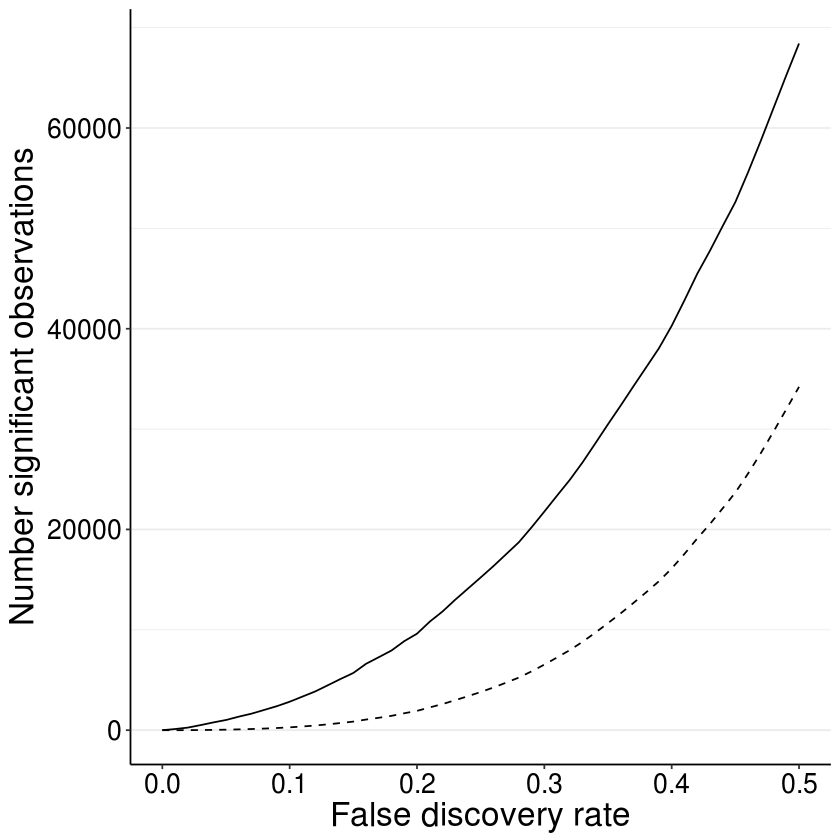

In [24]:
ggplot(results, aes(x=fdr)) +
    geom_line( aes(y=num))  +
      geom_line( aes(y=fd), linetype="dashed")  +
    theme_bw() +
    xlab("False discovery rate")+
    ylab("Number significant observations")+
    theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
        axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20)
    )

In [17]:
sigcmhvals=pvalsCMH[pvalsCMH$padj<0.2,]


In [26]:
ggsave(device="pdf", filename = "/data/sarahgw/WGS/SNPS/All_mylu/mafs/FDR_plot_cmh.pdf")

Saving 6.67 x 6.67 in image


In [17]:
write.csv(sigcmhvals2, file="/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNYnoout_sigCMH.csv")

In [7]:
sigcmhvals=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNYnoout_sigCMH.csv", header=T)

In [12]:
sigcmhvals2=merge(sigcmhvals, majmin, by=c("Scaffold", "SNP"))

In [16]:
head(sigcmhvals2)

Scaffold,SNP,X,pvals,padj,Major,Minor
AAPE02057001,9655,1250,3.915512e-05,0.1931030,A,C
AAPE02057833,26393,13652,3.611203e-05,0.1880243,A,G
AAPE02057895,53755,16958,2.982438e-05,0.1752540,A,C
AAPE02058260,28681,17313,1.488156e-05,0.1365398,C,T
AAPE02058260,28736,17316,1.039298e-05,0.1204305,G,T
AAPE02058873,26556,22923,3.234229e-05,0.1813250,C,T


In [13]:
sigcmhvals2

Scaffold,SNP,X,pvals,padj,Major,Minor
AAPE02057001,9655,1250,3.915512e-05,0.19310297,A,C
AAPE02057833,26393,13652,3.611203e-05,0.18802431,A,G
AAPE02057895,53755,16958,2.982438e-05,0.17525403,A,C
AAPE02058260,28681,17313,1.488156e-05,0.13653983,C,T
AAPE02058260,28736,17316,1.039298e-05,0.12043055,G,T
AAPE02058873,26556,22923,3.234229e-05,0.18132504,C,T
AAPE02059189,15644,27478,4.203009e-06,0.08528207,G,T
AAPE02059189,15750,27487,1.150925e-05,0.12451493,G,A
AAPE02059486,36281,29115,1.653064e-05,0.14231706,G,A
AAPE02059599,22315,30604,2.576744e-05,0.16498070,T,C


In [29]:
comPvaluesChrNJNY50outsig=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNY502noout_sigCompvalues_nr_Ne424_296_low.csv")

In [33]:
head(comPvaluesChrNJNY50outsig)

X,Scaffold,SNP,Maj,Min,num,NJ,NY_out,Comp,rank,padjBH
1,GL429819,365354,G,A,278,9.999990e-07,9.999990e-07,2.863097e-11,1,1.463945e-08
2,GL429859,300331,T,C,238,9.999990e-07,9.999990e-07,2.863097e-11,2,2.927890e-08
3,GL429770,8507307,A,C,437,9.999990e-07,1.999998e-06,5.587564e-11,3,4.391834e-08
4,GL429962,689293,A,C,401,1.999998e-06,9.999990e-07,5.587564e-11,4,5.855779e-08
5,GL429885,2043530,T,C,140,9.999990e-07,6.999993e-06,1.867954e-10,5,7.319724e-08
6,GL430008,1396110,C,T,76,1.999998e-06,3.999996e-06,2.124122e-10,6,8.783669e-08


In [54]:
NROW(sigcmhvals)

[1] 9615

In [30]:
sigboth=merge(comPvaluesChrNJNY50outsig, sigcmhvals, by=c("Scaffold", "SNP"))

In [31]:
NROW(sigboth)
(sigboth)

[1] 46

Scaffold,SNP,X,Maj,Min,num,NJ,NY_out,Comp,rank,padjBH,pvals,padj
GL429767,16839644,57,T,A,100,8.699991e-05,4.509995e-04,7.083696e-07,57,8.344486e-07,9.433821e-06,0.1161382969
GL429767,22649683,20,T,A,160,6.369994e-04,3.999996e-06,5.296761e-08,20,2.927890e-07,1.099930e-06,0.0495562777
GL429767,46534125,7,C,T,321,5.099995e-05,9.999990e-07,1.259657e-09,7,1.024761e-07,1.884315e-05,0.1492191804
GL429768,29962249,26,A,G,237,9.999990e-07,5.256995e-03,1.054747e-07,26,3.806257e-07,1.388260e-07,0.0215866433
GL429768,9041952,61,A,G,446,4.923295e-02,9.999990e-07,8.776603e-07,61,8.930063e-07,7.729437e-07,0.0427259028
GL429770,8507307,3,A,C,437,9.999990e-07,1.999998e-06,5.587564e-11,3,4.391834e-08,3.107764e-12,0.0001393196
GL429772,14993622,47,T,C,84,8.579991e-04,2.899997e-05,4.605431e-07,47,6.880541e-07,1.139490e-06,0.0502783711
GL429775,17831035,44,C,T,114,2.056498e-02,9.999990e-07,3.845581e-07,44,6.441357e-07,4.333704e-06,0.0859653502
GL429775,5556309,35,A,C,356,9.999990e-07,1.047199e-02,2.028900e-07,35,5.123807e-07,6.538970e-10,0.0013052912
GL429778,3561000,22,G,A,273,9.999990e-07,3.066997e-03,6.318795e-08,22,3.220679e-07,8.409529e-07,0.0440415061


In [32]:
write.csv(sigboth, file="/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNYnoout_sigCMH_overlap.csv")

In [ ]:
read.csv()

Copied from the vignette, accounting for drift 

In [35]:
#simulate the starting allele frequencies 
rep <- c(1,2,3)
p <- matrix(c(round(runif(10000, min=0, max=1)*2*Ne)/(2*Ne),
              round(runif(10000, min=0, max=1)*2*Ne)/(2*Ne),
              round(runif(10000, min=0, max=1)*2*Ne)/(2*Ne)), 
              ncol=length(rep))

#simulate random drift with generations 0 and 60
Ne <- 300
tp <- c(0, 60)
p_ev1 <- wf.traj(p0=p[,1], Ne=Ne, t=tp)
p_ev2 <- wf.traj(p0=p[,2], Ne=Ne, t=tp)
p_ev3 <- wf.traj(p0=p[,3], Ne=Ne, t=tp)
afMat <- cbind(p_ev1, p_ev2, p_ev3)

#simulate the coverage matrix
covMat <- cbind(rpois(length(p), lambda=80), rpois(length(p), lambda=80), 
                rpois(length(p), lambda=80), rpois(length(p), lambda=80), 
                rpois(length(p), lambda=80), rpois(length(p), lambda=80))

#add sampling noise to the allele frequency matrix
afMat <- rbinom(n=length(covMat), size=covMat, prob=afMat) / covMat

#compute the appropriate CMH test for this situation: drift (i.e. 
#evolving population for 60 generations) and no pool sequencing 
#(i.e. poolSize = NULL)
pval <- adapted.cmh.test(freq=afMat, coverage=covMat, Ne=rep(Ne,
                                length(rep)), gen=tp, repl = rep)

Warning message in adapted.cmh.test(freq = afMat, coverage = covMat, Ne = rep(Ne, :
“Ne value(s) which are not integer are converted to integer”Warning message in adapted.cmh.test(freq = afMat, coverage = covMat, Ne = rep(Ne, :
“The counts assuming values 0 or equal the coverage of the considered 
                    locus are changed to 1 and to coverage-1 respectively.”Warning message in adapted.cmh.test(freq = afMat, coverage = covMat, Ne = rep(Ne, :
“The counts assuming values 0 or equal the coverage of the considered 
                    locus are changed to 1 and to coverage-1 respectively.”

In [36]:
head(afMat)

0.87654321,0.7638889,0.8571429,0.7848101,0.91935484,0.8518519
0.65853659,0.4791667,0.6627907,0.5064935,0.69135802,0.5512821
0.98780488,1.0000000,0.9857143,1.0000000,0.97260274,1.0000000
0.01333333,0.4512195,0.0000000,0.4166667,0.01149425,0.5555556
0.63529412,0.7294118,0.5698925,0.6700000,0.55670103,0.6593407
0.48958333,0.2873563,0.4534884,0.3333333,0.49367089,0.3246753


In [37]:
head(tp)

[1]  0 60